# Лінійна регресія: перенавчання і регуляризація

У цьому завданні ми на прикладах побачимо, як перенавчаються лінійні моделі, розберемо, чому так відбувається, і з'ясуємо, як діагностувати та контролювати перенавчання.

В усіх комірках, де вказаний коментар з інструкціями, потрібно написати код, який виконує ці інструкції. Решту комірок із кодом (без коментарів) треба просто виконати. Крім того, у завданні необхідно відповідати на запитання; відповіді потрібно вписувати після виділеного слова "__Відповідь:__".

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Ми будемо працювати з датасетом __"bikes_rent.csv"__, у якому по днях записані календарна інформація та погодні умови, що характеризують автоматизовані пункти прокату велосипедів, а також кількість прокатів у цей день. Останнє ми будемо передбачати; таким чином, ми будемо розв'язувати завдання регресії.

### Ознайомлення з даними

## Завдання 1

Завантажте датасет за допомогою функції __pandas.read_csv__ у змінну __df__. Виведіть перші 5 рядків, щоб переконатися в коректному зчитуванні даних:

In [ ]:
df = pd.read_csv('bikes_rent.csv')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


Для кожного дня прокату відомі такі ознаки:
* _season_: 1 — весна, 2 — літо, 3 — осінь, 4 — зима
* _yr_: 0 — 2011, 1 — 2012
* _mnth_: від 1 до 12
* _holiday_: 0 — немає свята, 1 — є свято
* _weekday_: від 0 до 6
* _workingday_: 0 — неробочий день, 1 — робочий день
* _weathersit_: оцінка сприятливості погоди від 1 (чистий, ясний день) до 4 (злива, туман)
* _temp_: температура в Цельсіях
* _atemp_: температура за відчуттями в Цельсіях
* _hum_: вологість
* _windspeed(mph)_: швидкість вітру в милях за годину
* _windspeed(ms)_: швидкість вітру в метрах за секунду
* _cnt_: кількість орендованих велосипедів (це цільова ознака, її ми будемо передбачати)

Отже, у нас є речові, бінарні та номінальні (порядкові) ознаки, і з усіма з них можна працювати як з речовими. З номінальними ознаками теж можна працювати як з речовими, тому що на них заданий порядок. Давайте подивимося на графіках, як цільова ознака залежить від решти.

Побудуйте графіки залежностей атрибутів від кількості поїздок. Іншими словами, вам потрібно побудувати 12 графіків. На кожному має бути зображена залежність чергового атрибута від змінної **cnt**.

In [ ]:
# перед тим як будувати 12 графіків подивимось на залежності параметрів одне від одного в цілому
sns.pairplot(df)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7cb7a3868670> (for post_execute):


KeyboardInterrupt: 

<Axes: ylabel='cnt'>

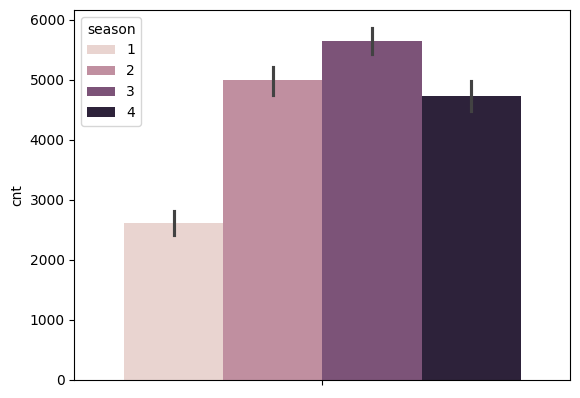

In [ ]:
# проаналізував датафрейм і його нпафічні відтворення переконуюсь що половина  ознак є категоріальними тож побудуємо для них стопчасті діаграми залежностей
sns.barplot(df, y='cnt', hue='season')

<Axes: ylabel='cnt'>

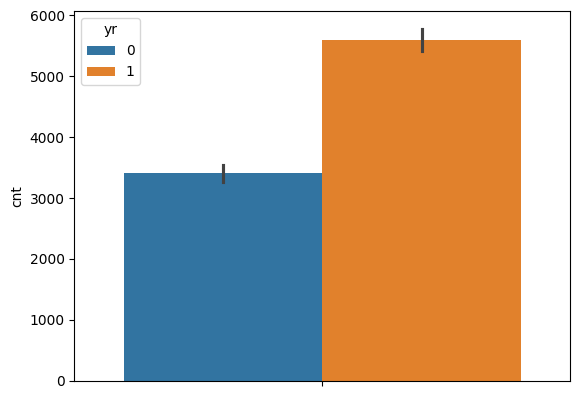

In [ ]:
sns.barplot(df, y='cnt', hue='yr')

<Axes: xlabel='mnth', ylabel='cnt'>

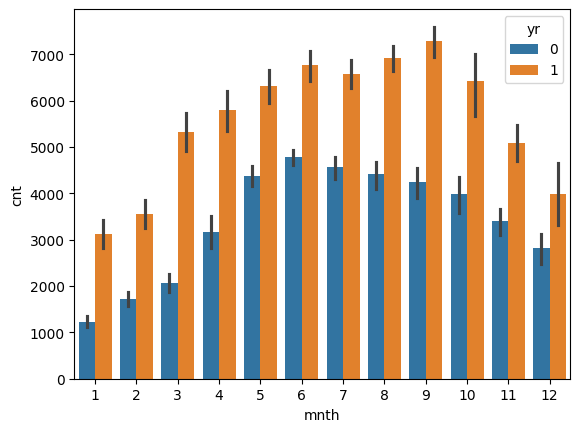

In [ ]:
# тут зробимо ще розподыл по року, загальну залежність це не зіпсує а різницю зміни по місяця, залежно від року додасть
sns.barplot(df, y='cnt', x='mnth', hue='yr')

<Axes: ylabel='cnt'>

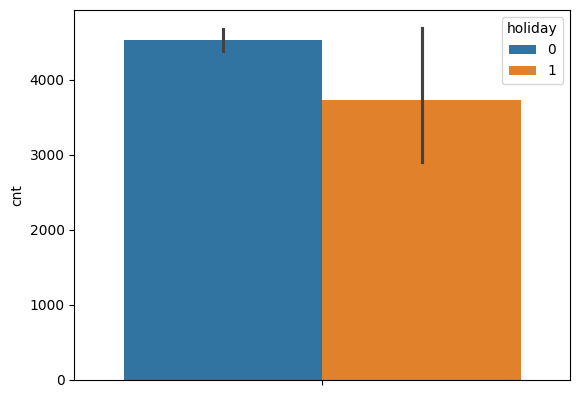

In [ ]:
sns.barplot(df, y='cnt', hue='holiday')

<Axes: ylabel='cnt'>

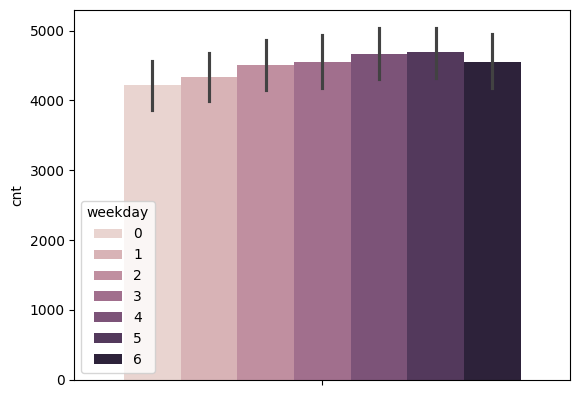

In [ ]:
sns.barplot(df, y='cnt', hue='weekday')

<Axes: ylabel='cnt'>

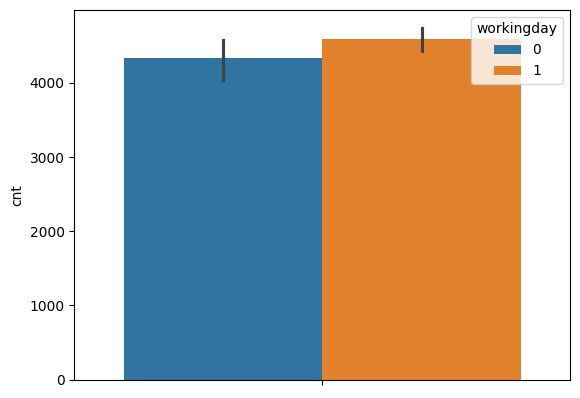

In [ ]:
sns.barplot(df, y='cnt', hue='workingday')

<Axes: ylabel='cnt'>

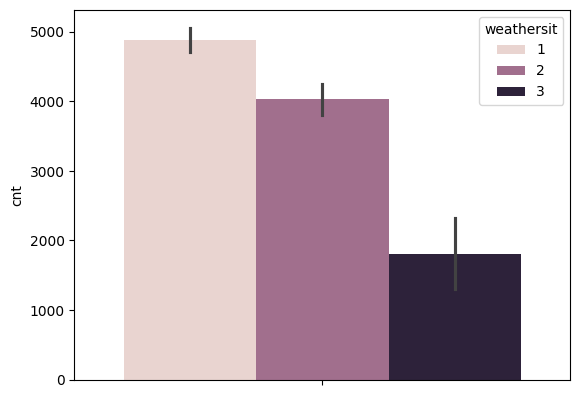

In [ ]:
sns.barplot(df, y='cnt', hue='weathersit')

<Axes: xlabel='cnt', ylabel='temp'>

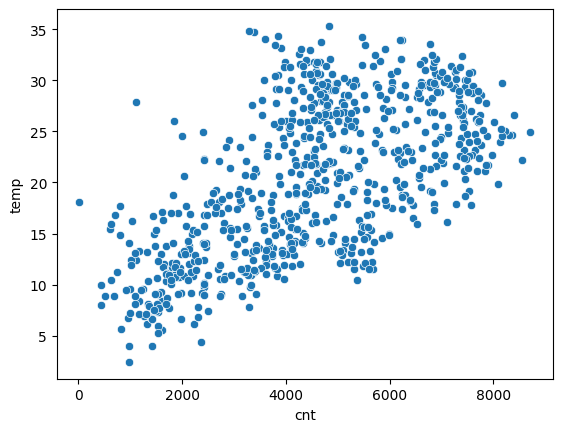

In [ ]:
# для числових ознак подивимось крапковий розподіл
sns.scatterplot(df, x='cnt',y='temp')

<Axes: xlabel='cnt', ylabel='atemp'>

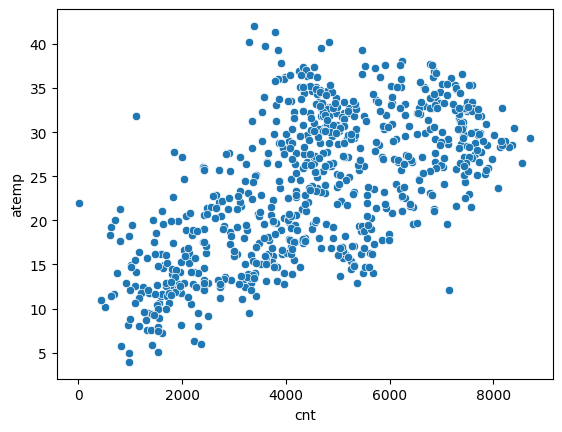

In [ ]:
sns.scatterplot(df, x='cnt',y='atemp')

<Axes: xlabel='cnt', ylabel='hum'>

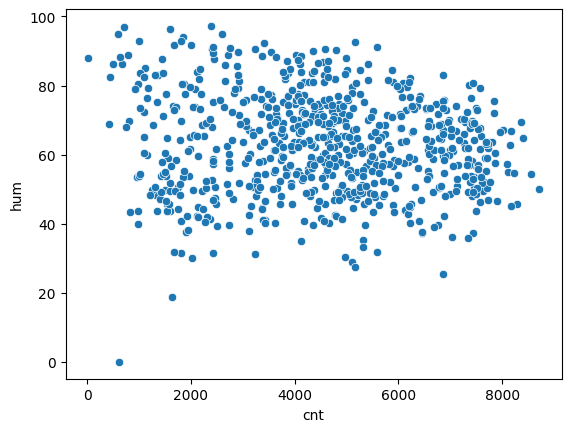

In [ ]:
sns.scatterplot(df, x='cnt',y='hum')

<Axes: xlabel='cnt', ylabel='windspeed(mph)'>

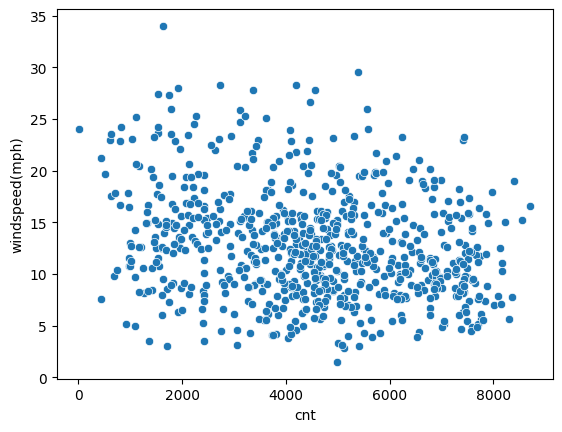

In [ ]:
sns.scatterplot(df, x='cnt',y='windspeed(mph)')

<Axes: xlabel='cnt', ylabel='windspeed(ms)'>

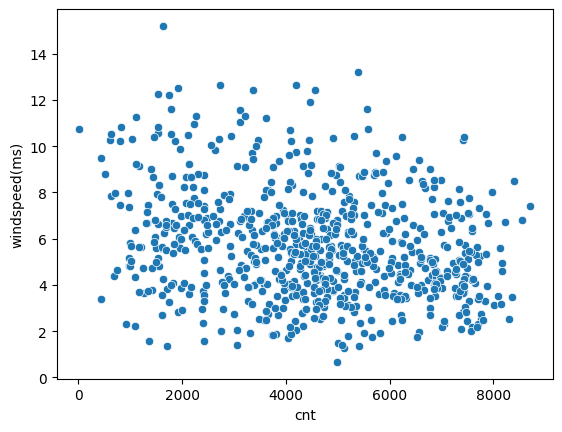

In [ ]:
sns.scatterplot(df, x='cnt',y='windspeed(ms)')

__Запитання:__
1. Яким є характер залежності кількості прокатів від місяця?
1. Вкажіть одну або дві ознаки, від яких кількість прокатів скоріше за все залежить лінійно.

1. Залежність кількості прокатів від місяця змінюється нелінійно. свого піку досягає в теплу пору року, невеликий спад  в 7-8 місяцях прпускаю пов'язано з тим що вони припадають на  місяці  коли найбільше людей іде у відпустку. тож локальні максимуми в червні(6місяць) і вересні (9 місяць) цілком логічні

2. витягнутість розподілу данних на графіку залежностей temp і atemp від cnt може вказувать на лінійну залежність. чим вище температура повітря тим більше в нас прокатів. звичайно такі ознаи як якість погоди, та вологість теж вносять певний вклад і псують  ідельну картину витягнутої лінії

## Завдання 2

Давайте більш строго оцінимо рівень лінійної залежності між ознаками та цільовою змінною. Гарною мірою лінійної залежності між двома векторами є кореляція Пірсона. Нам уже доводилося мати з нею справу раніше. Для її обчислення в pandas можна використовувати методи датафрейму: corr і corrwith.

Порахуйте кореляції всіх ознак, окрім останньої, з останньою за допомогою методу `corrwith`.

In [ ]:
df1 = df.drop('cnt', axis=1)
df2 = df.cnt
df1.corrwith(df2)

,0
season,0.406100
yr,0.566710
mnth,0.279977
holiday,-0.068348
weekday,0.067443
workingday,0.061156
weathersit,-0.297391
temp,0.627494
atemp,0.631066
hum,-0.100659


У вибірці є ознаки, що корелюють із цільовою, а отже, завдання можна розв'язувати лінійними методами.

За графіками видно, що деякі ознаки схожі між собою. Тому давайте також порахуємо кореляції між речовими ознаками.

## Завдання 3

Порахуйте попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) і cnt
за допомогою методу corr:

<Axes: >

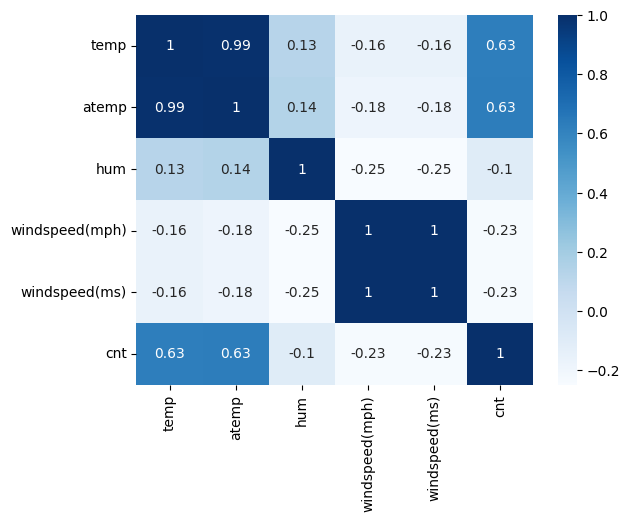

In [ ]:
# для наглядності також побудуєсо heatmap наших кореляцій
df_corr = df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']]
#plt.figure(figsize=(12,12))
sns.heatmap(df_corr.corr(), annot=True, cmap='Blues')

На діагоналях, як і належить, стоять одиниці. Однак у матриці є ще дві пари сильно корелюючих стовпців: temp і atemp (корелюють за своєю природою) і два windspeed (тому що це просто переведення одних одиниць в інші). Далі ми побачимо, що цей факт негативно позначається на навчанні лінійної моделі.

Насамкінець подивимося середні ознак (метод mean), щоб оцінити масштаб ознак і частки 1 у бінарних ознак.

## Завдання 4

Виведіть середні ознак.

In [ ]:
df.mean()

,0
season,2.496580
yr,0.500684
mnth,6.519836
holiday,0.028728
weekday,2.997264
workingday,0.683995
weathersit,1.395349
temp,20.310776
atemp,23.717699
hum,62.789406


Ознаки мають різний масштаб, отже, для подальшої роботи нам краще нормувати матрицю об'єкти-ознаки.

### Проблема перша: колінеарні ознаки

Отже, у наших даних одна ознака дублює іншу, і є ще дві дуже схожі. Звичайно, ми могли б одразу видалити дублікати, але давайте подивимося, як відбувалося б навчання моделі, якби ми не помітили цю проблему.

Для початку проведемо масштабування, або стандартизацію ознак: з кожної ознаки віднімемо її середнє і поділимо на стандартне відхилення. Це можна зробити за допомогою методу scale.

Крім того, необхідно перемішати вибірку, це буде потрібно для крос-валідації.

In [ ]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [ ]:
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

Давайте навчимо лінійну регресію на наших даних і подивимося на ваги ознак.

In [ ]:
from sklearn.linear_model import LinearRegression

## Завдання 5

Створіть об'єкт лінійного регресора, навчіть його на всіх даних і виведіть ваги моделі (ваги зберігаються у змінній `coef_` класу регресора). Можна виводити пари (назва ознаки, вага), скориставшись функцією `zip`, вбудованою в мову python. Назви ознак зберігаються у змінній `df.columns`.


In [ ]:
model = LinearRegression()
model.fit(X, y)
w_0 = model.intercept_
w_k = model.coef_
print(f'bias weight: {w_0}')
print('Інші ваги моделі')
for _ in zip(df.columns, w_k):
    print(_)

bias weight: 4504.354528214392
Інші ваги моделі
('season', 570.8637960129914)
('yr', 1021.9653779400622)
('mnth', -141.3017451148728)
('holiday', -86.7593446245368)
('weekday', 137.22506441350538)
('workingday', 56.391881775973005)
('weathersit', -330.2264620440312)
('temp', 367.48373260182126)
('atemp', 585.5493861188597)
('hum', -145.61430569885857)
('windspeed(mph)', 12457138390688.885)
('windspeed(ms)', -12457138390887.346)


Ми бачимо, що ваги при лінійно-залежних ознаках за модулем значно більші, ніж при інших ознаках. Щоб зрозуміти, чому так сталося, згадаємо аналітичну формулу, за якою обчислюються ваги лінійної моделі в методі найменших квадратів:

$$w = (X^TX)^{-1} X^T y$$

Якщо в $X$ є колінеарні (лінійно-залежні) стовпці, матриця $X^TX$ стає виродженою, і формула перестає бути коректною. Чим більш залежні ознаки, тим менший визначник цієї матриці й тим гірша апроксимація $Xw \approx y$. Таку ситуацію називають _проблемою мультиколінеарності_.

З парою (temp, atemp) трохи менше корелюючих змінних такого не сталося, однак на практиці завжди варто уважно стежити за коефіцієнтами при схожих ознаках.

Для того щоб розв'язати проблему мультиколінеарності, потрібно скористатися регуляризатором. До оптимізуючого функціоналу додають $L_1$ або $L_2$ норму ваг, помножену на коефіцієнт регуляризації $\alpha$. У першому випадку метод називається Lasso, а у другому — Ridge.

### Завдання 6
Давайте спробуємо навчити лінійні моделі з $L_1$ і $L_2$-регуляризацією, а далі порівняємо їхні ваги. Навчіть регресори Ridge і Lasso з параметрами за замовчуванням і переконайтеся, що проблема з вагами вирішилась.

Навчіть лінійну модель з $L_1$-регуляризацією (клас Lasso) і виведіть ваги.

In [ ]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=1)
model_lasso.fit(X, y)
lasso_w_0 = model_lasso.intercept_
lasso_w_k = model_lasso.coef_
print(f'bias weight: {lasso_w_0}')
print('Інші ваги моделі')
for _ in zip(df.columns, lasso_w_k):
    print(_)

bias weight: 4504.3488372093025
Інші ваги моделі
('season', 560.2416160308861)
('yr', 1019.4634940657196)
('mnth', -128.73062703678696)
('holiday', -86.15278133371106)
('weekday', 137.34789390496314)
('workingday', 55.21237064135668)
('weathersit', -332.3698569623487)
('temp', 376.3632362096943)
('atemp', 576.530793504555)
('hum', -144.12915500348583)
('windspeed(mph)', -197.1396894024843)
('windspeed(ms)', -2.8051404183533485e-08)


Навчіть лінійну модель з $L_2$-регуляризацією (клас Ridge) і виведіть ваги.

In [ ]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=1, solver='cholesky')
model_ridge.fit(X, y)
ridge_w_0 = model_ridge.intercept_
ridge_w_k = model_ridge.coef_
print(f'bias weight: {ridge_w_0}')
print('Інші ваги моделі')
for _ in zip(df.columns, ridge_w_k):
    print(_)

bias weight: 4504.3488372093025
Інші ваги моделі
('season', 563.0645722520181)
('yr', 1018.9483787875305)
('mnth', -131.87332028247715)
('holiday', -86.74609799709232)
('weekday', 138.00511117871918)
('workingday', 55.90311037506467)
('weathersit', -332.34978849907367)
('temp', 386.45788919190807)
('atemp', 566.3470470600669)
('hum', -145.07132729867195)
('windspeed(mph)', -99.25944108179067)
('windspeed(ms)', -99.25944115434177)


### Завдання 7

На відміну від $L_2$-регуляризації, $L_1$ обнуляє ваги при деяких ознаках. Давайте поспостерігаємо, як змінюються ваги зі збільшенням коефіцієнта регуляризації $\alpha$.

Для кожного значення коефіцієнта з `alphas` навчіть регресор `Lasso` і запишіть ваги у список `coefs_lasso`, а потім навчіть `Ridge` і запишіть ваги у список`coefs_ridge`. Конвертуйте отримані списки в `np.array`.

In [ ]:
alphas = np.arange(1, 500, 50)

coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    model_ridge = Ridge(alpha=alpha, solver='cholesky').fit(X, y)
    model_lasso = Lasso(alpha=alpha).fit(X, y)
    coefs_ridge.append(model_ridge.coef_)
    coefs_lasso.append(model_lasso.coef_)

coefs_ridge = np.array(coefs_ridge)
coefs_lasso = np.array(coefs_lasso)

Проаналізуйте динаміку ваг при збільшенні параметра регуляризації:

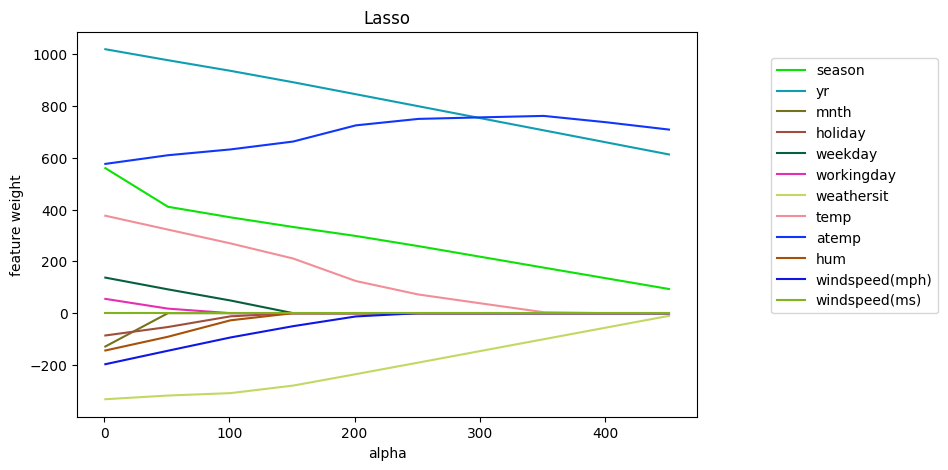

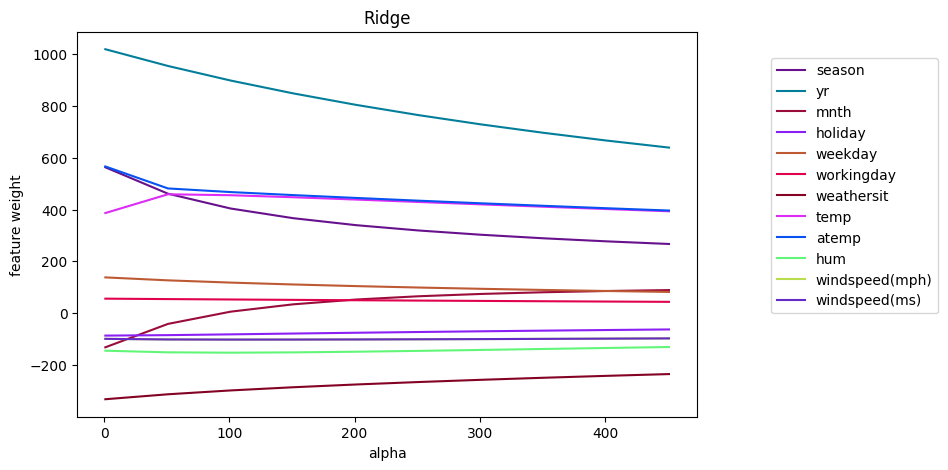

In [ ]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Проаналізуйте графіки та дайте відповіді на такі запитання.

1. Який регуляризатор (Ridge або Lasso) агресивніше зменшує ваги при одному й тому самому alpha?
1. Що станеться з вагами Lasso, якщо alpha зробити дуже великим? Поясніть, чому так відбувається.
1. Чи можна стверджувати, що `Lasso` виключає одну з ознак `windspeed` при будь-якому значенні `alpha > 0`? А Ridge? Вважається, що регуляризатор виключає ознаку, якщо коефіцієнт при ньому менший $10^{-3}$.
1. Який із регуляризаторів підійде для відбору неінформативних ознак?

Відповіді:
1.  на візуалізації Lasso ми бачимо що усі показники feature weight помітно прямують до 0, окрім показника 'temp', і нахил графіків більший ніж на візуалізації Ridge. тож регуляризатор Lasso агресивніше зменшує ваги при одному й тому самому alpha.

2. пре великому значення alpha ваги Lasso зійдуться до нуля. це випливає з рівняння норми l1 вагового вектора (тобто ridge підносить ваги до 1/2 норми квадрата і вони зменшуються досить повільно) а Лассо ні. Тим самим вона , випускаючи розряджену модель намагаючись її спростити. Як каже конспект, чим більше alpha, тим нижче складність моделі, а значить Lasso намагається повністю виключити ваги найменш вагомих ознак, і далі, і далі, аж поки ознак не залишиться і модель не стане абсолютно ідеальною.

3. на графіку, один з фіолетових гафіків належачих якомусь з windspeed починається з нуля одразу. тож так можно сказати що Lasso виключає при будь яклму alpha. На візуалізації Ridge ми такого не бачимо.

4. Lasso на мою думку найбільше підійде для відбору неінформативних ознак.

### Завдання 8

Далі будемо працювати з `Lasso`.

Отже, ми бачимо, що при зміні alpha модель по-різному підбирає коефіцієнти ознак. Нам потрібно вибрати найкраще alpha.

Для цього, по-перше, нам потрібна метрика якості. Будемо використовувати як метрику сам оптимізований функціонал методу найменших квадратів, тобто `Mean Square Error`.

По-друге, потрібно зрозуміти, на яких даних цю метрику рахувати. Не можна вибирати `alpha` за значенням MSE на навчальній вибірці, тому що тоді ми не зможемо оцінити, як модель буде робити передбачення на нових для неї даних. Якщо ми виберемо одне розбиття вибірки на навчальну та тестову (це називається holdout), то налаштуємося на конкретні "нові" дані, і знову можемо перенавчитися. Тому будемо робити декілька розбиттів вибірки, на кожному пробувати різні значення alpha, а потім усереднювати MSE. Найзручніше робити такі розбиття крос-валідацією, тобто розділити вибірку на $K$ частин, і кожного разу брати одну з них як тестову, а з блоків, що залишилися, складати навчальну вибірку.

Робити крос-валідацію для регресії в sklearn зовсім просто: для цього є спеціальний регресор, __LassoCV__, який бере на вхід список із alpha і для кожного з них обчислює MSE на крос-валідації. Після навчання (якщо залишити параметр cv=3 за замовчуванням) регресор буде містити змінну __mse\_path\___, матрицю розміру len(alpha) x k, k = 3 (число блоків у крос-валідації), що містить значення MSE на тесті для відповідних запусків. Крім того, у змінній alpha\_ буде зберігатися вибране значення параметра регуляризації, а в coef\_, традиційно, навчені ваги, що відповідають цьому alpha_.

Зверніть увагу, що регресор може змінювати порядок, у якому він проходить по alphas; для зіставлення з матрицею MSE краще використовувати змінну регресора alphas_.

Навчіть регресор `LassoCV` на всіх параметрах регуляризації з alpha. Побудуйте графік _усередненого_ за рядками `MSE` в залежності від `alpha` (використовуйте для цього функцію `create_plot`).

Виведіть вибране `alpha`, а також пари "ознака-коефіцієнт" для навченого вектора коефіцієнтів.

In [ ]:
# трохи спростимо функцію, бо матплотлиб лається на генератори
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    #x = map(lambda e: e[0], data)
    #y = map(lambda e: e[1], data)
    x = data[0]
    y = data[1]
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

In [ ]:
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 100, 5)

regressor = LassoCV(cv=3, alphas=alphas).fit(X, y)
print(f'Найкраще alpha: {regressor.alpha_}')
print('Інші ваги моделі')
for _ in zip(df.columns, regressor.coef_):
    print(_)

Найкраще alpha: 6
Інші ваги моделі
('season', 532.0189828413535)
('yr', 1015.0602226430595)
('mnth', -100.03952614356629)
('holiday', -83.29395987529904)
('weekday', 132.50446549095795)
('workingday', 51.557085614073735)
('weathersit', -330.5598567399817)
('temp', 370.67985503003405)
('atemp', 581.396931065498)
('hum', -140.00740550068844)
('windspeed(mph)', -191.77140847135036)
('windspeed(ms)', -2.6854702314758792e-08)


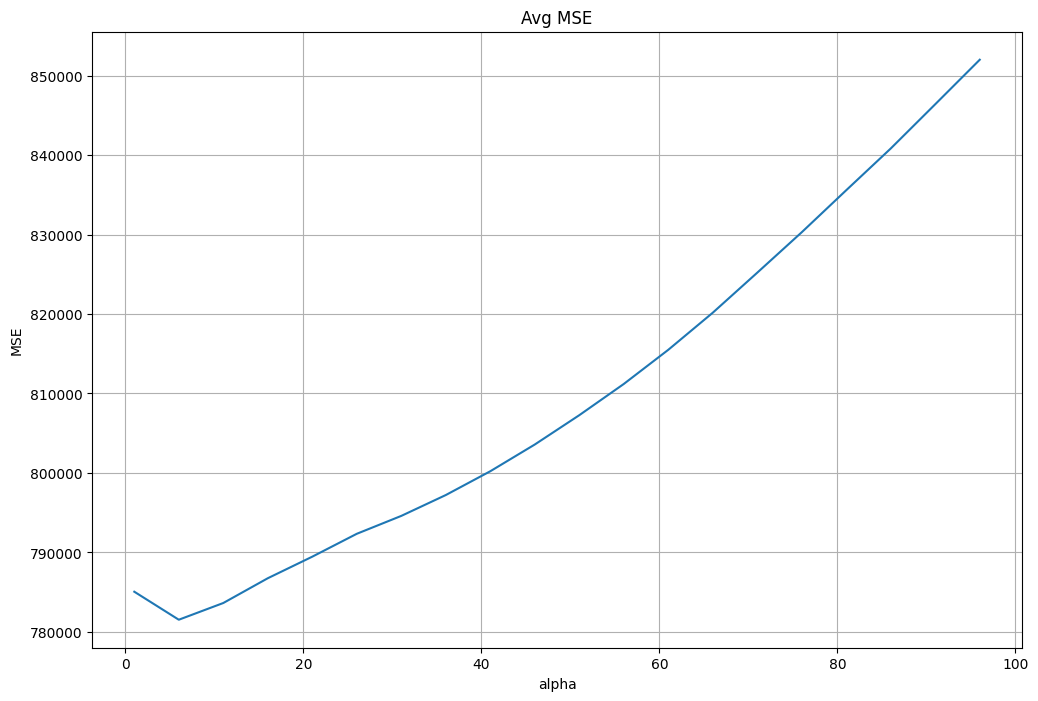

In [ ]:
# створимо датафрейм з впорядкованих по значенню alpha середніх значень MSE по нашим трьом валідаціям
data = np.c_[regressor.alphas_, regressor.mse_path_.mean(axis=1)]
data = pd.DataFrame(data)
create_plot(data=data, title='Avg MSE', xlabel='alpha', ylabel='MSE', figsize=(12, 8))

Отже, ми вибрали певний параметр регуляризації. Давайте подивимося, які б ми вибирали alpha, якби ділили вибірку лише один раз на навчальну та тестову, тобто розглянемо траєкторії MSE, що відповідають окремим блокам вибірки.

### Завдання 9

Виведіть значення `alpha`, що відповідають мінімумам `MSE` на кожному розбитті (тобто за стовпцями).
На трьох окремих графіках візуалізуйте стовпці `mse_path_`.


In [ ]:
# для зручного відображення графіків модифікуємо фукцію їх побудови
def create_plot_new(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    for i in range(data.shape[1] - 1):
        x = data[0]
        y = data[i+1]
        plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

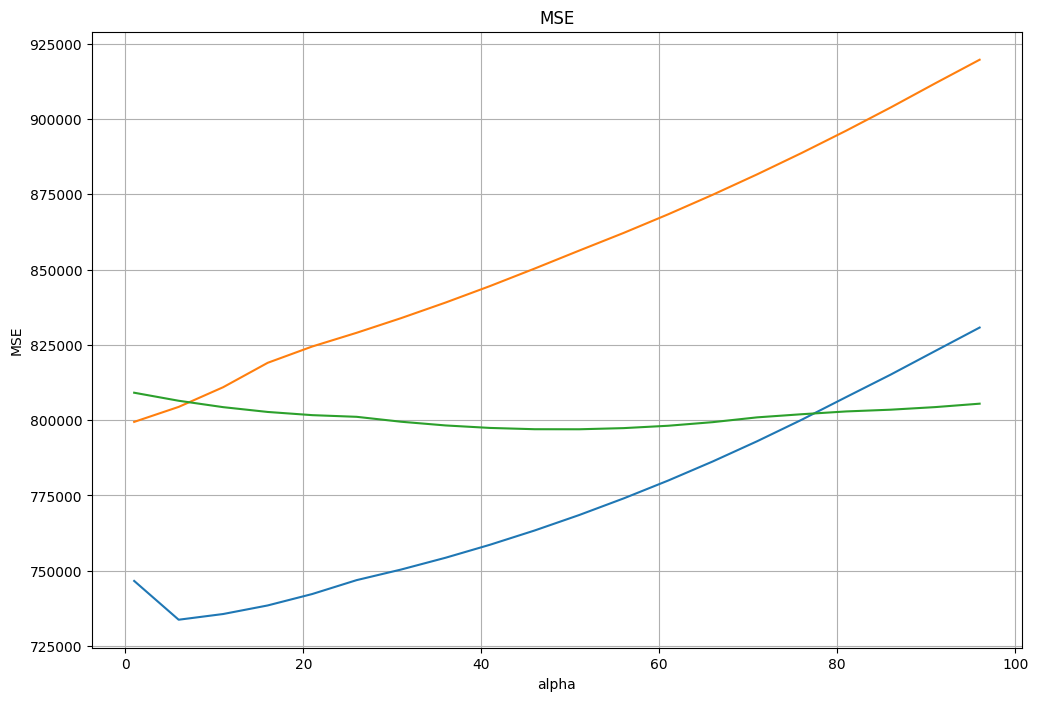

In [ ]:
# зробимо зручний датафрейм зі значенням MSE по кожному розбиттю
data1 = pd.DataFrame(np.c_[regressor.alphas_, regressor.mse_path_])
create_plot_new(data=data1, title='MSE', xlabel='alpha', ylabel='MSE', figsize=(12, 8))

In [ ]:
print('Alphas with minimum MSE:')
for i in range(data1.shape[1] - 1):
    mse = data1[i+1].min()
    idx = data1[0][data1[i+1].idxmin()]

    print(f'Alpha = {idx}, MSE = {mse}')

Alphas with minimum MSE:
Alpha = 6.0, MSE = 733725.7604052249
Alpha = 1.0, MSE = 799433.1673691692
Alpha = 51.0, MSE = 796979.8955193626


На кожному розбитті оптимальне значення `alpha` своє, і йому відповідає велике MSE на інших розбиттях. Виходить, що ми налаштовуємося на конкретні навчальні та контрольні вибірки. При виборі `alpha` на крос-валідації ми вибираємо дещо "середнє", що даватиме прийнятне значення метрики на різних розбиттях вибірки.

### Завдання 10

Нарешті, як прийнято в аналізі даних, давайте проінтерпретуємо результат. Дайте відповіді на наступні запитання.

#### Запитання 1

В останній навченій моделі виберіть 4 ознаки з найбільшими (позитивними) коефіцієнтами (і випишіть їх), подивіться на візуалізації залежностей `cnt` від цих ознак, які ми зображали у блоці "Ознайомлення з даними". Чи видно зростаючу лінійну залежність `cnt` від цих ознак за графіками? Чи логічно стверджувати (виходячи зі здорового глузду), що чим більше значення цих ознак, тим більше людей захочуть взяти велосипеди?

__Відповідь:__

In [ ]:
# ознаки з найбільшими коефіцієнтами 'season', 532.0189828413535; 'yr', 1015.0602226430595; 'atemp', 581.396931065498; 'temp', 370.67985503003405
# про ознаку 'yr' звичайно можна сказати що є лінійне зростання, бо ми маємо всього лише 2 точки на 2 роки. чи буде ця залежність лінійна надалі, це вже не факт
# ознака 'season' циклічно міняється тож задежнійсть більш періодична
# ознаки temp і atemp самі по собі лінійно залежні, тож можна розглядати їх як одну
# з точки зору лінійної моделі можна передбачити, шо коли температура виросте до 100 градусів цельсія то показник сnt значно збільшится,
# а коли до 500, то мабуть усе місто пересяде виключно на велосипеди, але з точки зору здорового глузду такого збільшення мабуть не буде,
# і скоріш навіть зменшення


#### Запитання 2

Виберіть 3 ознаки з найбільшими за модулем негативними коефіцієнтами (і випишіть їх), подивіться на відповідні візуалізації. Чи видно лінійну залежність, що зменшується? Чи логічно стверджувати, що чим більша величина цих ознак, тим менше людей захочуть взяти велосипеди?

__Відповідь:__

In [ ]:
# 3 ознаки з найбільшими за модулем негативними коефіцієнтами 'weathersit', -330.5598567399817; 'windspeed(mph)',
# -191.77140847135036; 'hum', -140.00740550068844
# у випадку weathersit ми ясно бачимо: чим більша ознака, що означає погіршення погоди, тим менше маємо прокатів, залежність наближена до лінійної
# у випадку 'windspeed(mph)' та 'hum' бачимо що щільність прокатів падає з ростом показника, в випадку 'hum' менше виражено, тож да
# при значній вологості, можливо навіть прямо випадаючої з хмар та збільшення вітру катання на велосипеді втрачає сенс

#### Запитання 3

Випишіть ознаки з коефіцієнтами, близькими до нуля (< 1e-3). Як ви думаєте, чому модель виключила їх із моделі (знову подивіться на графіки)? Чи правда, що вони ніяк не впливають на попит на велосипеди?

__Відповідь:__

In [ ]:
# ознака близька до нуля 'windspeed(ms)', -2.6854702314758792e-08, ця ознака була виключена з моделі мабуть ізза 100% залежності від іншої,
# що ми можемо побачити на візуалізації матриці коваріації, і на попердній візуалізації всіх залежностей ознак, що робилась на самому початку
# цією ознакою можна було знехтувати од початку

### Висновок
Отже, ми подивилися, як можна стежити за адекватністю лінійної моделі, як відбирати ознаки і як грамотно, за можливості не налаштовуючись на якусь конкретну порцію даних, підбирати коефіцієнт регуляризації.

Варто зазначити, що за допомогою крос-валідації зручно підбирати лише невелику кількість параметрів. (1, 2, максимум 3), тому що для кожної допустимої їх комбінації нам доводиться декілька разів навчати модель. Такий процес займає багато часу, особливо якщо треба навчатися на великих обсягах даних.